In [27]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [29]:
LoL = pd.read_csv("/content/drive/MyDrive/Coding Dojo/Project 2/high_diamond_ranked_10min_league_of_legends.csv")
LoL.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [30]:
LoL.shape

(9879, 40)

In [31]:
LoL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [32]:
LoL.duplicated().any()

False

In [33]:
LoL.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [34]:
#Determine if potential target vector is balanced
LoL.blueWins.value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

In [35]:
LoL.blueDragons.value_counts()

0    6303
1    3576
Name: blueDragons, dtype: int64

In [36]:
LoL.redDragons.value_counts()

0    5798
1    4081
Name: redDragons, dtype: int64

In [37]:
LoL.redFirstBlood.value_counts()

0    4987
1    4892
Name: redFirstBlood, dtype: int64

In [38]:
LoL.blueFirstBlood.value_counts()

1    4987
0    4892
Name: blueFirstBlood, dtype: int64

In [39]:
LoL.redTotalMinionsKilled.mean()

217.3492256301245

In [40]:
LoL.blueTotalMinionsKilled.mean()

216.6995647332726

In [41]:
Blue_Wins = LoL["blueWins"] == 1
Blue_Lose = LoL["blueWins"] == 0
Blue_Dragons = LoL["blueDragons"] == 1
Blue_First_Blood = LoL["blueFirstBlood"] == 1
Blue_Wins

0       False
1       False
2       False
3       False
4       False
        ...  
9874     True
9875     True
9876    False
9877    False
9878     True
Name: blueWins, Length: 9879, dtype: bool

In [42]:
Red_Dragons = LoL["redDragons"] == 1
Red_First_Blood = LoL["redFirstBlood"] == 1
Red_Dragons

0       False
1        True
2       False
3       False
4        True
        ...  
9874    False
9875    False
9876     True
9877    False
9878     True
Name: redDragons, Length: 9879, dtype: bool

In [43]:
Blue_Minions_Killed_Greater_217 = LoL["blueTotalMinionsKilled"] >= 217
Blue_Minions_Killed_Greater_217

0       False
1       False
2       False
3       False
4       False
        ...  
9874    False
9875     True
9876    False
9877     True
9878    False
Name: blueTotalMinionsKilled, Length: 9879, dtype: bool

In [44]:
Blue_Minions_Killed_Lesser_217 = LoL["blueTotalMinionsKilled"] < 217
Blue_Minions_Killed_Lesser_217

0        True
1        True
2        True
3        True
4        True
        ...  
9874     True
9875    False
9876     True
9877    False
9878     True
Name: blueTotalMinionsKilled, Length: 9879, dtype: bool

In [45]:
Red_Minions_Killed_Greater_217 = LoL["redTotalMinionsKilled"] >= 217
Red_Minions_Killed_Greater_217

0       False
1        True
2       False
3        True
4        True
        ...  
9874     True
9875    False
9876     True
9877     True
9878    False
Name: redTotalMinionsKilled, Length: 9879, dtype: bool

In [46]:
Red_Minions_Killed_Lesser_217 = LoL["redTotalMinionsKilled"] < 217
Red_Minions_Killed_Lesser_217

0        True
1       False
2        True
3       False
4       False
        ...  
9874    False
9875     True
9876    False
9877    False
9878     True
Name: redTotalMinionsKilled, Length: 9879, dtype: bool

In [47]:
BlueWins_BlueMinionsGreater = LoL[Blue_Wins & Blue_Minions_Killed_Greater_217]
BlueLose_BlueMinionsGreater = LoL[Blue_Lose & Blue_Minions_Killed_Greater_217]
#BlueWins_BlueMinionsGreater
BlueLose_BlueMinionsGreater

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
10,4452162573,0,20,3,1,4,4,6,0,0,0,0,15474,6.6,16611,231,28,331,-1585,23.1,1547.4,15,2,0,4,4,5,1,1,0,0,15143,7.2,18196,216,51,-331,1585,21.6,1514.3
22,4480384157,0,17,2,0,4,6,3,0,0,0,0,15773,7.0,17562,238,56,-1254,-567,23.8,1577.3,16,3,1,6,4,10,1,1,0,0,17027,7.0,18129,231,60,1254,567,23.1,1702.7
23,4520898233,0,78,4,0,4,3,4,2,1,1,0,15906,6.8,19219,238,67,406,1283,23.8,1590.6,15,3,1,3,4,3,0,0,0,0,15500,7.0,17936,220,64,-406,-1283,22.0,1550.0
27,4501319968,0,19,3,1,7,4,9,0,0,0,0,17226,7.0,18982,228,61,1857,2015,22.8,1722.6,14,4,0,4,7,2,1,1,0,0,15369,6.6,16967,202,49,-1857,-2015,20.2,1536.9
28,4519148589,0,105,5,1,8,6,13,1,1,0,0,17474,6.8,17436,217,53,1320,-413,21.7,1747.4,65,3,0,6,8,11,0,0,0,0,16154,6.8,17849,223,40,-1320,413,22.3,1615.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,4527742166,0,20,5,1,4,4,5,1,1,0,0,15903,7.0,17640,239,48,428,400,23.9,1590.3,17,3,0,4,4,6,0,0,0,0,15475,6.8,17240,217,57,-428,-400,21.7,1547.5
9851,4527637091,0,15,2,0,4,8,2,0,0,0,0,14709,6.6,17092,217,38,-2591,-1250,21.7,1470.9,13,3,1,8,4,10,1,1,0,0,17300,7.2,18342,236,55,2591,1250,23.6,1730.0
9853,4527865649,0,17,2,0,7,8,9,1,0,1,0,17394,6.8,17904,261,32,188,-676,26.1,1739.4,29,4,1,8,7,7,0,0,0,0,17206,7.0,18580,212,56,-188,676,21.2,1720.6
9858,4527782537,0,51,3,1,3,6,7,1,1,0,0,14857,6.8,16510,226,43,-959,-1248,22.6,1485.7,29,3,0,6,3,3,1,0,1,0,15816,6.8,17758,195,58,959,1248,19.5,1581.6


In [48]:
LoL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

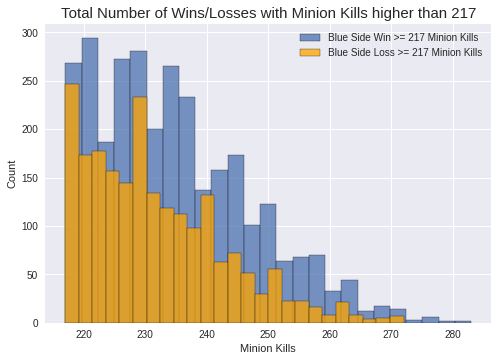

In [49]:
plt.style.use("seaborn")
sns.histplot(BlueWins_BlueMinionsGreater["blueTotalMinionsKilled"], 
             label = "Blue Side Win >= 217 Minion Kills",
             bins = 25, 
             edgecolor='black');
sns.histplot(BlueLose_BlueMinionsGreater["blueTotalMinionsKilled"], 
             label = "Blue Side Loss >= 217 Minion Kills", 
             bins = 25, 
             edgecolor='black', 
             color='orange');
plt.xlabel("Minion Kills");
plt.ylabel("Count");
plt.legend();
plt.title("Total Number of Wins/Losses with Minion Kills higher than 217", fontsize = 15);

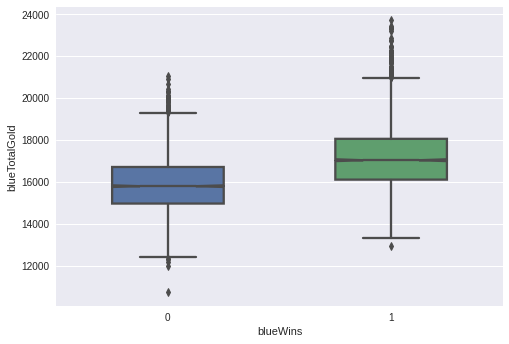

In [50]:
sns.boxplot(x=LoL['blueWins'], y=LoL['blueTotalGold'], linewidth=2.3, notch=True, width=.5);

In [73]:
Blue_Wins_df = LoL[LoL["blueWins"] == 1]
Blue_Wins_df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5
12,4515594785,1,18,1,1,7,1,11,1,1,0,0,17865,7.4,19102,238,53,3274,1659,23.8,1786.5,12,1,0,1,7,1,0,0,0,0,14591,6.8,17443,240,50,-3274,-1659,24.0,1459.1
14,4516505202,1,15,3,1,4,4,4,0,0,0,0,15722,6.8,17896,224,51,-470,-187,22.4,1572.2,102,1,0,4,4,3,0,0,0,0,16192,7.0,18083,242,48,470,187,24.2,1619.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,4527650398,1,12,0,1,7,7,9,0,0,0,0,17155,7.0,18002,231,36,756,1,23.1,1715.5,60,3,0,7,7,8,1,1,0,0,16399,7.0,18001,216,58,-756,-1,21.6,1639.9
9873,4527878058,1,18,2,1,12,6,13,0,0,0,0,18573,7.2,19391,207,46,2639,2364,20.7,1857.3,16,6,0,6,12,6,0,0,0,0,15934,6.6,17027,197,38,-2639,-2364,19.7,1593.4
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6


In [74]:
corr = Blue_Wins_df.corr()
corr

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,NaN,0.003969,-0.021113,-0.018419,-0.048896,-0.000201,-0.033807,0.014529,-0.001435,0.024457,-0.010854,-0.049750,-0.052081,-0.055092,-0.007471,-0.019679,-0.033774,-0.033346,-0.007471,-0.049750,0.013869,0.017697,0.018419,-0.000201,-0.048896,0.005203,0.025436,0.024702,0.009697,0.012357,-0.001797,0.005103,-0.002851,0.006634,0.000498,0.033774,0.033346,0.006634,-0.001797
blueWins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueWardsPlaced,0.003969,NaN,1.000000,0.044477,-0.013065,0.022376,0.019148,0.045454,0.012122,0.012889,0.003558,0.006965,0.023407,0.043802,0.033727,-0.045971,0.017973,0.001099,0.017621,-0.045971,0.023407,-0.014344,0.122467,0.013065,0.019148,0.022376,0.010744,-0.022867,-0.019487,-0.012531,0.008586,0.025134,0.007558,0.005878,0.003216,0.003523,-0.001099,-0.017621,0.003216,0.025134
blueWardsDestroyed,-0.021113,NaN,0.044477,1.000000,-0.015741,0.006153,-0.047448,0.042694,0.019040,0.020028,0.005847,-0.018618,0.024043,0.030836,0.030073,0.085031,-0.035283,0.040935,0.048785,0.085031,0.024043,0.164422,0.118219,0.015741,-0.047448,0.006153,-0.028082,-0.024760,-0.017022,-0.019281,-0.009338,-0.039549,-0.040836,-0.043685,0.039246,-0.043259,-0.040935,-0.048785,0.039246,-0.039549
blueFirstBlood,-0.018419,NaN,-0.013065,-0.015741,1.000000,0.196008,-0.216800,0.153923,0.114992,0.101798,0.058231,0.072626,0.235098,0.104072,0.119031,0.083968,-0.007356,0.326350,0.168354,0.083968,0.235098,-0.019541,-0.054672,-1.000000,-0.216800,0.196008,-0.180079,-0.093576,-0.101606,-0.020638,-0.038929,-0.265323,-0.129360,-0.136313,-0.125860,-0.010063,-0.326350,-0.168354,-0.125860,-0.265323
blueKills,-0.048896,NaN,0.022376,0.006153,0.196008,1.000000,0.149690,0.790753,0.093120,0.089866,0.038267,0.174743,0.878246,0.372781,0.404582,-0.132222,-0.169885,0.633036,0.540008,-0.132222,0.878246,-0.026385,-0.105329,-0.196008,0.149690,1.000000,0.082151,-0.165313,-0.147001,-0.082001,-0.023081,-0.028727,-0.356529,-0.415655,-0.459561,-0.199431,-0.633036,-0.540008,-0.459561,-0.028727
blueDeaths,-0.000201,NaN,0.019148,-0.047448,-0.216800,0.149690,1.000000,0.099515,-0.135110,-0.145216,-0.037789,-0.048622,0.003280,-0.288756,-0.336311,-0.414824,-0.174273,-0.526882,-0.458533,-0.414824,0.003280,0.000687,0.049609,0.216800,1.000000,0.149690,0.796899,0.113381,0.108604,0.045335,0.100331,0.868970,0.331857,0.359789,-0.101511,-0.155025,0.526882,0.458533,-0.101511,0.868970
blueAssists,-0.033807,NaN,0.045454,0.042694,0.153923,0.790753,0.099515,1.000000,0.065121,0.098603,-0.016006,0.107335,0.718197,0.211396,0.210671,-0.165631,-0.182098,0.508893,0.365121,-0.165631,0.718197,-0.028319,-0.068140,-0.153923,0.099515,0.790753,0.092496,-0.131102,-0.133240,-0.041684,-0.005067,-0.009074,-0.295117,-0.340601,-0.308433,-0.146632,-0.508893,-0.365121,-0.308433,-0.009074
blueEliteMonsters,0.014529,NaN,0.012122,0.019040,0.114992,0.093120,-0.135110,0.065121,1.000000,0.769308,0.645066,0.160636,0.148344,0.127754,0.157514,0.070772,0.184211,0.188830,0.169929,0.070772,0.148344,0.000360,-0.004284,-0.114992,-0.135110,0.093120,-0.102350,-0.434416,-0.451766,-0.123740,-0.038178,-0.139347,-0.089993,-0.102192,-0.034896,-0.060833,-0.188830,-0.169929,-0.034896,-0.139347
blueDragons,-0.001435,NaN,0.012889,0.020028,0.101798,0.089866,-0.145216,0.098603,0.769308,1.000000,0.008071,0.022831,0.095550,0.10

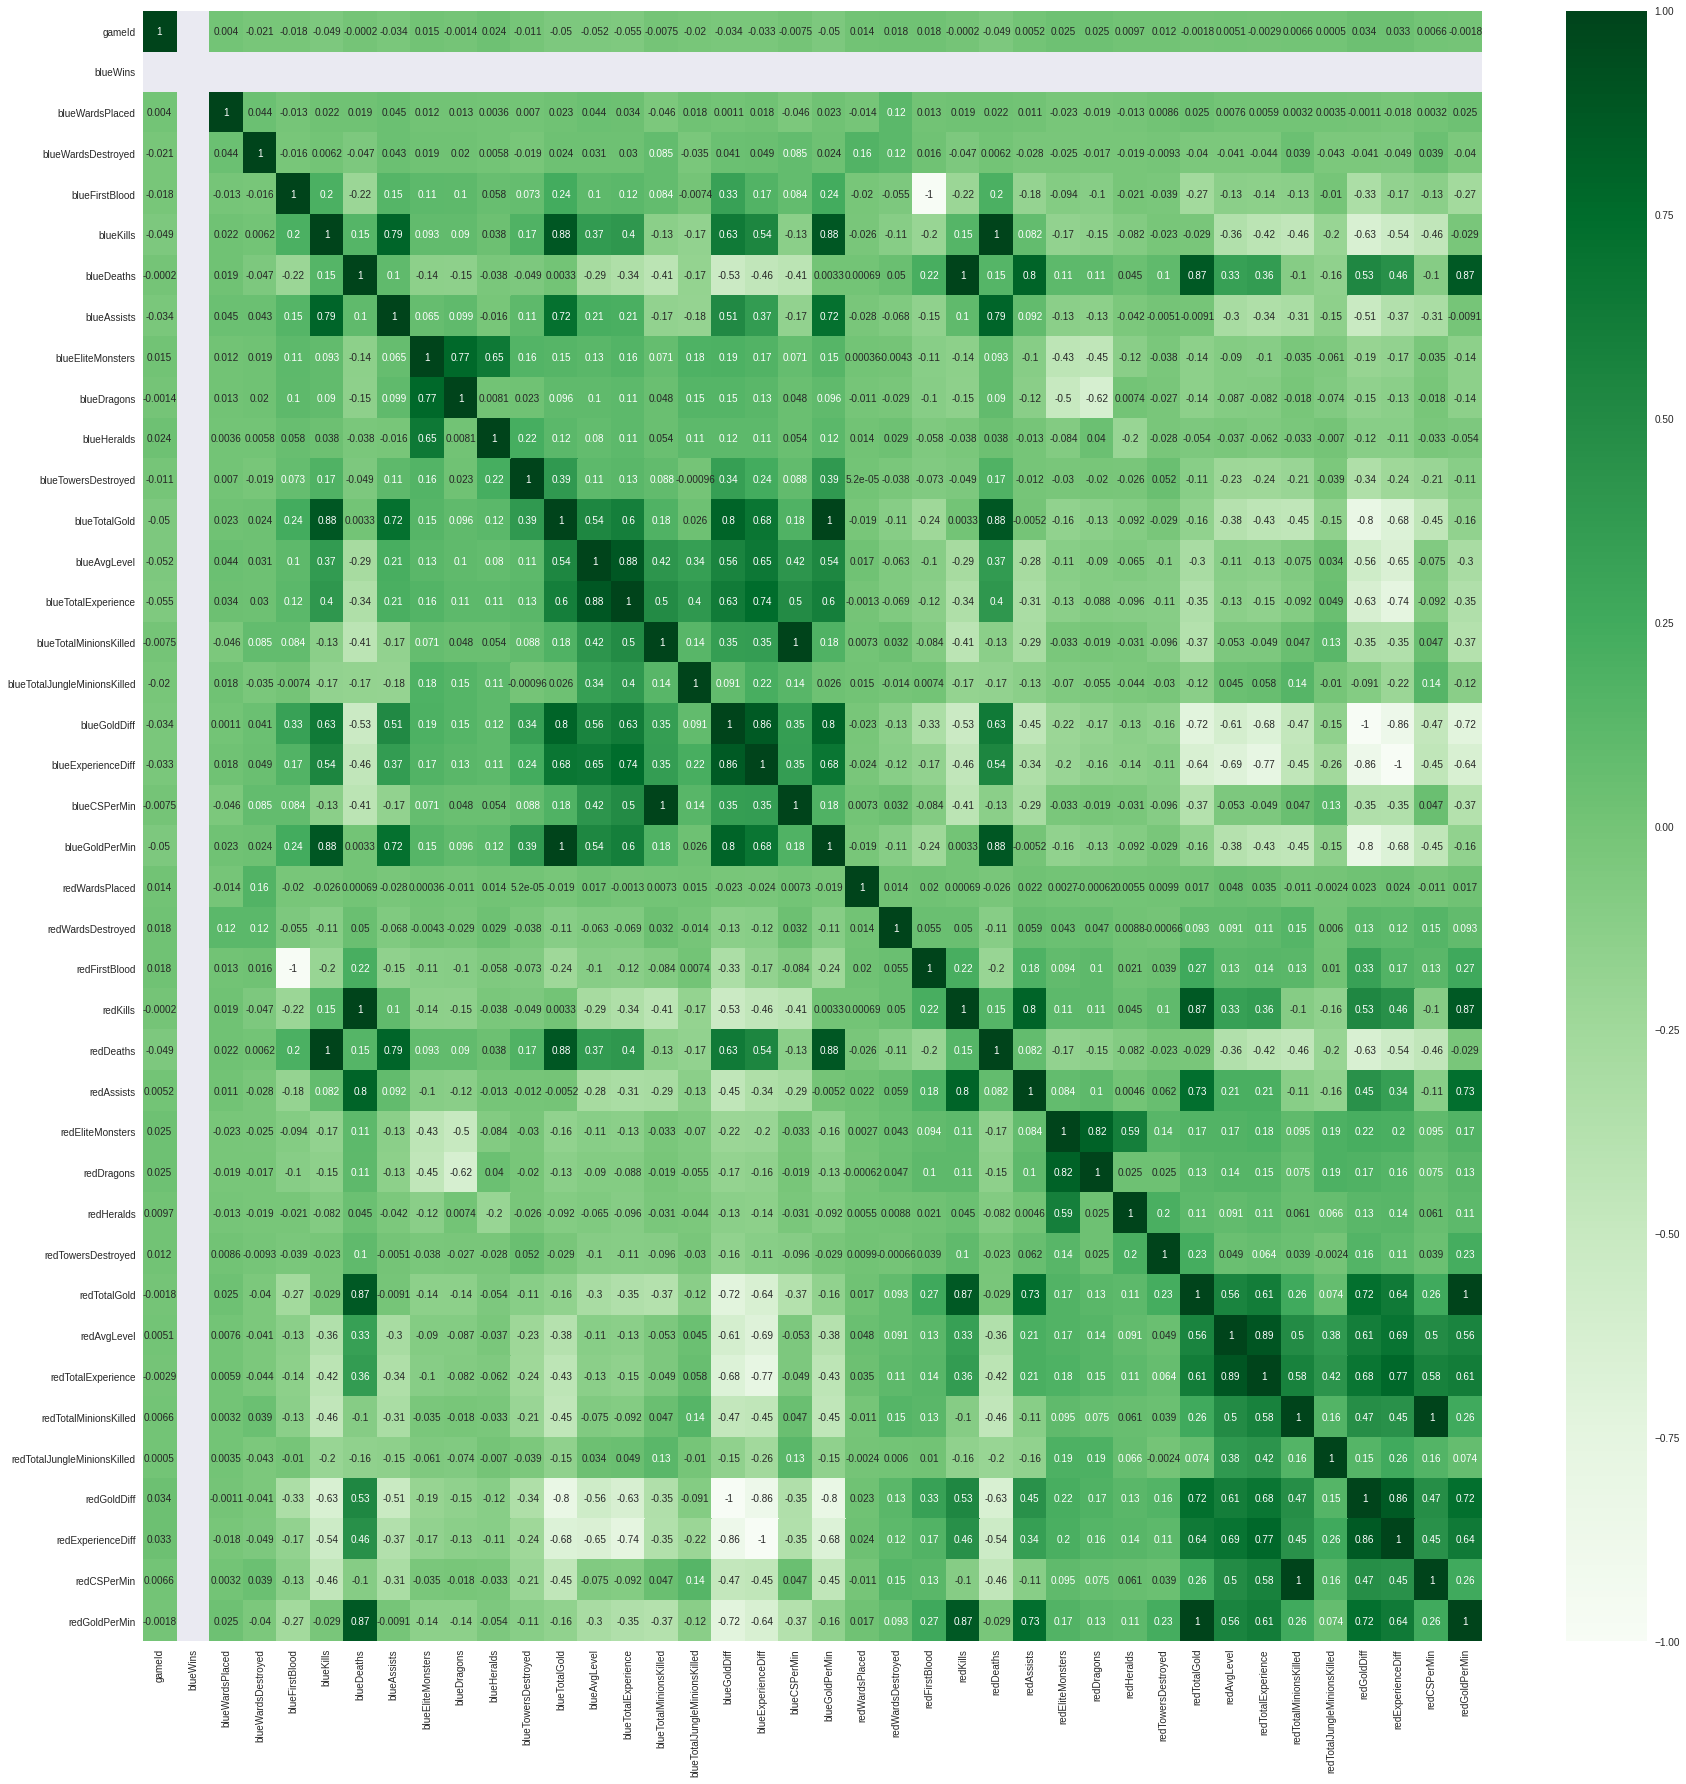

In [78]:
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(corr, cmap = 'Greens', annot = True);

In [51]:
#Modeling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [52]:
#Lin Reg

In [53]:
X =LoL.loc[:, LoL.columns[(LoL.columns != 'blueWins')]]
X.shape

(9879, 39)

In [54]:
y = LoL.loc[:, ["blueWins"]].values
y.shape

(9879, 1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [56]:
Lin_reg = LinearRegression(fit_intercept = True)
Lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
prediction = Lin_reg.predict(X)
Lin_reg.score(X,y)

0.28048958394567713

In [58]:
Lin_reg.score(X_test, y_test)

0.28363795306933315

In [59]:
#KNN Pipeline
from sklearn.pipeline import make_pipeline

In [60]:
regression_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [61]:
regression_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsregressor',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

In [62]:
print("Training R2:", regression_pipe.score(X_train, y_train))
print("Testing R2:", regression_pipe.score(X_test, y_test))

Training R2: 0.43085136987978345
Testing R2: 0.15478487094354654


In [63]:
#Bagged Trees
bt = BaggingRegressor(n_estimators=200, oob_score=True)
bt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=200,
                 n_jobs=None, oob_score=True, random_state=None, verbose=0,
                 warm_start=False)

In [64]:
np.sqrt(mean_squared_error(y_train, bt.predict(X_train)))

0.16041364695468463

In [65]:
np.sqrt(mean_squared_error(y_test, bt.predict(X_test)))

0.43292100568809533

In [66]:
bt.score(X_train, y_train)

0.8970693055772948

In [67]:
bt.score(X_test, y_test)

0.250317119813221

In [68]:
#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [69]:
np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

0.43402335801618297

In [70]:
rf.score(X_train, y_train)

0.8958790037241913

In [71]:
rf.score(X_test, y_test)

0.24649440475628503